## Quaker's Network

Before there were Facebook friends, there was the Society of Friends, known as the Quakers. Founded in England in the mid-seventeenth century, the Quakers were Protestant Christians who dissented from the official Church of England and promoted broad religious toleration, preferring Christians’ supposed “inner light” and consciences to state-enforced orthodoxy. Quakers’ numbers grew rapidly in the mid- to late-seventeenth century and their members spread through the British Isles, Europe, and the New World colonies—especially Pennsylvania, founded by Quaker leader William Penn and the home of your four authors.

Since scholars have long linked Quakers’ growth and endurance to the effectiveness of their networks, the data used in this tutorial is a list of names and relationships among the earliest seventeenth-century Quakers. This dataset is derived from the Oxford Dictionary of National Biography and from the ongoing work of the Six Degrees of Francis Bacon project, which is reconstructing the social networks of early modern Britain (1500-1700)


In [1]:
import networkx as nx
# To visualize in jupyter
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

In [3]:
nodes_data = pd.read_csv('quakers_nodelist.csv')

In [4]:
nodes_data[1:]

,Name,Historical Significance,Gender,Birthdate,Deathdate,ID
1,Alexander Skene of Newtyle,local politician and author,male,1621,1694,10011149
2,James Logan,colonial official and scholar,male,1674,1751,10007567
3,Dorcas Erbery,Quaker preacher,female,1656,1659,10003983
4,Lilias Skene,Quaker preacher and poet,male,1626,1697,10011152
5,William Mucklow,religious writer,male,1630,1713,10008595
...,...,...,...,...,...,...
114,Thomas Ellwood,religious controversialist,male,1639,1713,10003945
115,William Simpson,Quaker preacher,male,1627,1671,10011114
116,Samuel Bownas,Quaker minister and writer,male,1677,1753,10001390
117,John Perrot,Quaker schismatic,male,1555,1665,10009584


In [5]:
edges_data = pd.read_csv('quakers_edgelist.csv')

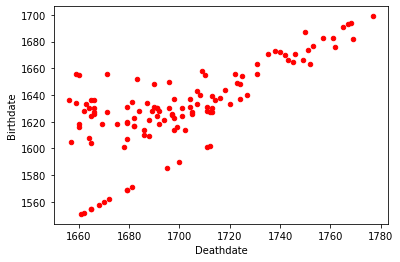

In [13]:
ax=plt.gca()
nodes_data.plot(kind='scatter',x='Deathdate',y='Birthdate',color='red',ax=ax)

plt.show()

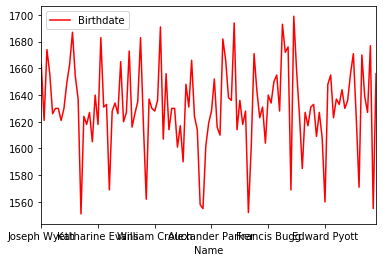

In [16]:
ax=plt.gca()
nodes_data.plot(kind='line',x='Name',y='Birthdate',color='red',ax=ax)

plt.show()

Construct network

In [6]:
# construct nodes and edges
node_names=[n for n in nodes_data['Name']]
edges = [(s,t) for s,t in zip(edges_data['Source'],edges_data['Target'])]

In [7]:
# Construct dictionaries for attributes
his_sig = nodes_data.set_index('Name')['Historical Significance'].to_dict()
gender = nodes_data.set_index('Name')['Gender'].to_dict()
birthdate = nodes_data.set_index('Name')['Birthdate'].to_dict()
deathdate = nodes_data.set_index('Name')['Deathdate'].to_dict()
id_dict = nodes_data.set_index('Name')['ID'].to_dict()

In [8]:
# to avoid KeyError: <type 'numpy.int64'>
birthdate={i:int(x) for i,x in birthdate.items()}
deathdate={i:int(x) for i,x in deathdate.items()}
id_dict={i:int(x) for i,x in id_dict.items()}

In [9]:
G = nx.Graph()
# add nodes and edges
G.add_nodes_from(node_names)
G.add_edges_from(edges)
# set attributes
nx.set_node_attributes(G,name='historical_significance',values=his_sig)
nx.set_node_attributes(G,name='gender',values=gender)
nx.set_node_attributes(G,name='birthdate',values=birthdate)
nx.set_node_attributes(G,name='deathdate',values=deathdate)
nx.set_node_attributes(G,name='ID',values=id_dict)

In [33]:
G.nodes

NodeView(('Joseph Wyeth', 'Alexander Skene of Newtyle', 'James Logan', 'Dorcas Erbery', 'Lilias Skene', 'William Mucklow', 'Thomas Salthouse', 'William Dewsbury', 'John Audland', 'Richard Claridge', 'William Bradford', 'Fettiplace Bellers', 'John Bellers', 'Isabel Yeamans', 'George Fox the younger', 'George Fox', 'John Stubbs', 'Anne Camm', 'John Camm', 'Thomas Camm', 'Katharine Evans', 'Lydia Lancaster', 'Samuel Clarridge', 'Thomas Lower', 'Gervase Benson', 'Stephen Crisp', 'James Claypoole', 'Thomas Holme', 'John Freame', 'John Swinton', 'William Mead', 'Henry Pickworth', 'John Crook', 'Gilbert Latey', 'Ellis Hookes', 'Joseph Besse', 'James Nayler', 'Elizabeth Hooten', 'George Whitehead', 'John Whitehead', 'William Crouch', 'Benjamin Furly', 'Silvanus Bevan', 'Robert Rich', 'John Whiting', 'Christopher Taylor', 'Thomas Lawson', 'Richard Farnworth', 'William Coddington', 'Thomas Taylor', 'Richard Vickris', 'Robert Barclay', 'Jane Sowle', 'Tace Sowle', 'Leonard Fell', 'Margaret Fell', 

In [40]:
G.nodes['Joseph Wyeth']['deathdate']

1731

In [42]:
G.nodes['Alexander Skene of Newtyle']['birthdate']

1621

In [ ]:
ax=plt.gca()
G.nodes.plot(kind='scatter',x='Year',y='Violent',color='red',ax=ax)

plt.show()

/Users/bongsoojang/opt/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


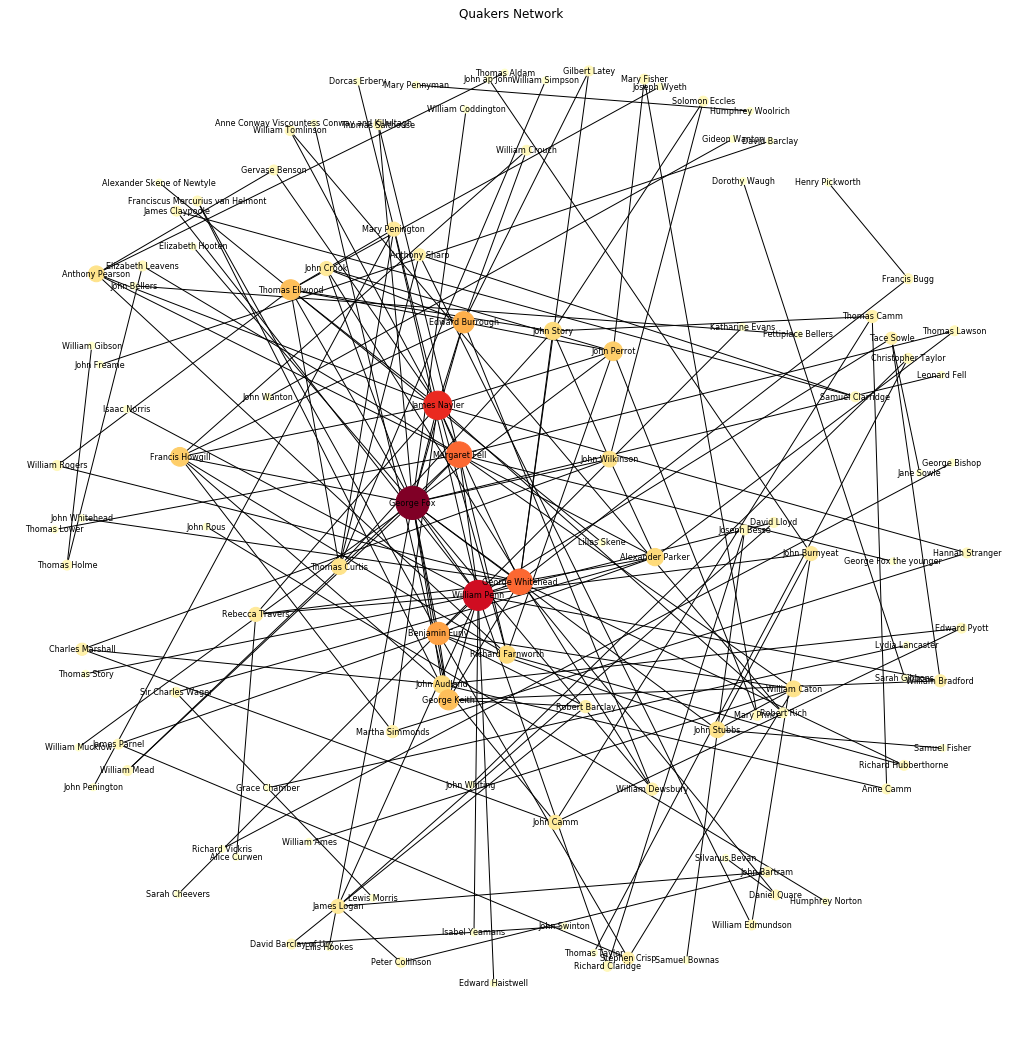

In [10]:
dig = dict(nx.degree(G)) # degree of network
pos=nx.spring_layout(G,k=1) # positions for all nodes
plt.figure(figsize=(14,14)) #Control figure size
nx.draw(G,pos,with_labels=True
        ,node_size = [d*50 for d in dig.values()] # node size
        ,node_color= list(dig.values()) # data for label color
        ,font_size=8 # labelsize
        ,cmap=plt.cm.YlOrRd # color_map
       )
plt.title('Quakers Network');
plt.savefig('Quaker.png', format="PNG") # Save figure

##  Problem 1: 

(1) Draw the Quakers Network with different node color depending node's gender.

(2) Draw the Quakers Network with different node size with repect to the node's birth date ( use the at least three different color. For example, red if birthdate in 15th, blue if the birthdats in 16th and green otherwise)  

## Star Wars Network

- Construct Network by using Starwars scripts


In [17]:
# encoding="utf8" used to avoid error in actor name
ep1 = pd.read_csv('StarWars_ep1.csv',encoding="utf8") # Episode I   - The Phantom Menace
ep2 = pd.read_csv('StarWars_ep2.csv',encoding="utf8") # Episode II  - Attack of the Clones

In [18]:
ep1[:10]

,episode,scene_num,sequence,place,type,actor,dialogue
0,1,1,1,REPUBLIC CRUISER,INT,QUI-GON,Captain.
1,1,1,2,REPUBLIC CRUISER,INT,CAPTAIN,"Yes, sir?"
2,1,1,3,REPUBLIC CRUISER,INT,QUI-GON,Tell them we wish to board at once.
3,1,1,4,REPUBLIC CRUISER,INT,CAPTAIN,"Yes, sir."
4,1,1,5,REPUBLIC CRUISER,INT,CAPTAIN,"With all due respect for the Trade Federation,..."
5,1,1,6,REPUBLIC CRUISER,INT,NUTE,"Yes, yes, of coarse...ahhh...as you know, our ..."
6,1,3,7,FEDERATION BATTLESHIP,INT,PK-4,They must be important if the Viceroy sent one...
7,1,3,8,FEDERATION BATTLESHIP,INT,TC-14,"I'm TC-14 at your service. This way, please."
8,1,3,9,FEDERATION BATTLESHIP,INT,EG-9,A Republic cruiser! That's trouble...don't you...
9,1,3,10,FEDERATION BATTLESHIP,INT,PR-4,I'm not made to think.


In [20]:
ep2[:5]

,episode,scene_num,sequence,place,type,actor,dialogue
0,2,2,1,CORUSCANT,EXT,PADMÉ,Cordé...
1,2,2,2,CORUSCANT,EXT,CORDÉ,"... I'm sorry, m'lady... I'm... not sure I..."
2,2,2,3,CORUSCANT,EXT,AMIDALA,No!... No!... No!...
3,2,2,4,CORUSCANT,EXT,AMIDALA,I should not have come back.
4,2,2,5,CORUSCANT,EXT,CAPTAIN TYPHO,"M'Lady, you are still in danger."


## Problem 2: 

- For the epsode 1, construct the Actor- Actor network and show the plot. 
That is, node : Actor, Edge: Actors appear in the same scene

- For the epsode 2, construct the Actor- Place network and show the plot. 
That is, node : Actor, Edge: Actors appear in the same place